In [1]:
import torch
import random
import numpy as np
import pandas as pd
from torch import nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
df = pd.read_csv('./Raisin_Dataset.csv')

In [3]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
# converting df class outputs to labels instead of string
# to be done for all samples

df.iloc[:450, 7] = 0
df.iloc[450:, 7] = 1

<AxesSubplot:>

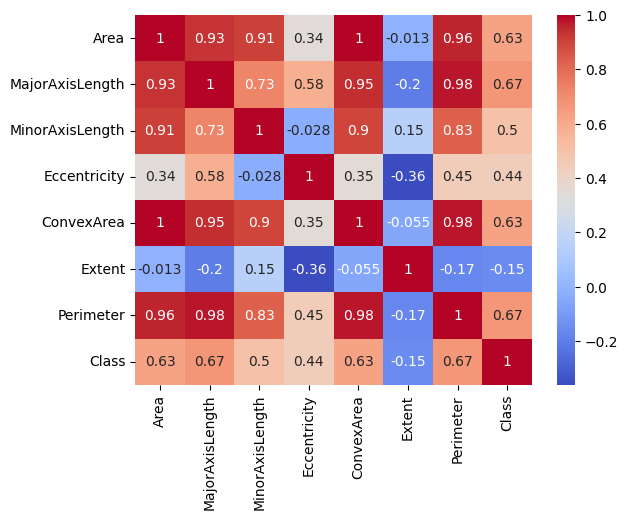

In [5]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

In [6]:
Y = df['Class'].iloc[:].to_numpy().astype(np.float32) # change this based on output

In [7]:
df.drop(['Extent', 'Eccentricity', 'MinorAxisLength', 'Class'], axis=1, inplace=True)
df.iloc[:, :].to_numpy().shape

(900, 4)

In [8]:
n_components = 1  # You can change this to the desired number of components
pca = PCA(n_components=n_components)

data_np = df.to_numpy()

# Fit PCA to the data
pca.fit(data_np)

# Transform the data using the learned PCA transformation
X = pca.transform(data_np)

# # Convert the transformed data back to a tensor
# data_pca_tensor = torch.tensor(data_pca)

# # Print the shape of the transformed data
# print("Shape of the transformed data:", data_pca_tensor.shape)

In [9]:
# shuffle first 
# shuffling data

combined = list(zip(X, Y))

# Shuffle the combined list
random.shuffle(combined)

# Unzip the shuffled list to get back the original order
X_np_shuffled, Y_np_shuffled = zip(*combined)

X = np.array(X_np_shuffled)
Y = np.array(Y_np_shuffled)

In [10]:
X.shape

(900, 1)

In [11]:
train_split, test_split = 0.7, 0.3
assert train_split + test_split == 1;

split_index = int(train_split * df.shape[0])
X_train = X[:split_index]
Y_train = Y[:split_index]


In [12]:
X_train_tensor = torch.from_numpy(np.array(X_train))
Y_train_tensor = torch.from_numpy(np.array(Y_train))

In [13]:
X_train_tensor.shape

torch.Size([630, 1])

In [14]:
#normalizing the tensor
X_train_tensor_normalized = []
for i in range(X_train_tensor.shape[1]):
    # print(i + 1)
    X_train_tensor_normalized.append((X_train_tensor[:, i] - torch.mean(X_train_tensor[:, i])) / torch.std(X_train_tensor[:, i]))


X_train_tensor_normalized = torch.from_numpy(np.array(X_train_tensor_normalized)).reshape(split_index, -1)
X_train_tensor_normalized.shape


torch.Size([630, 1])

In [15]:
def draw_distribution(arr):
    return

mean = 0  # Mean of the distribution
std_dev = 1  # Standard deviation of the distribution
num_points = 3200  # Number of points to generate

# Generate 32 points from a normal distribution
points = np.random.normal(mean, std_dev, num_points)

In [20]:
class RaisinNetwork(nn.Module):

    def __init__(self):
        super().__init__()
        self.container = nn.Sequential(
            nn.Linear(1, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 8),
            nn.LeakyReLU(),
            nn.Linear(8, 1),
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.container(x)
        x = self.sigmoid(x)
        return x
        

In [21]:
rn = RaisinNetwork()

In [22]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(rn.parameters(), lr=3e-2)

In [23]:
epochs = 500
for i in range(epochs):
    loss = loss_fn(rn(X_train_tensor_normalized.float()), Y_train_tensor.reshape(-1, 1).float())
    print(f'EPOCH {i + 1} | LOSS {loss}')
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

EPOCH 1 | LOSS 0.7059260010719299
EPOCH 2 | LOSS 0.6868484616279602
EPOCH 3 | LOSS 0.6598475575447083
EPOCH 4 | LOSS 0.5993249416351318
EPOCH 5 | LOSS 0.5218734741210938
EPOCH 6 | LOSS 0.47821441292762756
EPOCH 7 | LOSS 0.42769548296928406
EPOCH 8 | LOSS 0.45639029145240784
EPOCH 9 | LOSS 0.4462521970272064
EPOCH 10 | LOSS 0.4457045793533325
EPOCH 11 | LOSS 0.4127819240093231
EPOCH 12 | LOSS 0.4054611921310425
EPOCH 13 | LOSS 0.41365182399749756
EPOCH 14 | LOSS 0.41122427582740784
EPOCH 15 | LOSS 0.4083517789840698
EPOCH 16 | LOSS 0.4124342203140259
EPOCH 17 | LOSS 0.41175004839897156
EPOCH 18 | LOSS 0.4053792655467987
EPOCH 19 | LOSS 0.4015967547893524
EPOCH 20 | LOSS 0.4025988280773163
EPOCH 21 | LOSS 0.40376153588294983
EPOCH 22 | LOSS 0.4023636281490326
EPOCH 23 | LOSS 0.4034302830696106
EPOCH 24 | LOSS 0.4008011221885681
EPOCH 25 | LOSS 0.39741235971450806
EPOCH 26 | LOSS 0.3973909020423889
EPOCH 27 | LOSS 0.3984777629375458
EPOCH 28 | LOSS 0.39890071749687195
EPOCH 29 | LOSS 0.39

In [24]:
X_test_tensor = torch.from_numpy(X[split_index:])
Y_test_tensor = torch.from_numpy(Y[split_index:])

In [25]:
X_test_tensor.shape

torch.Size([270, 1])

In [26]:
Y_test_tensor.shape

torch.Size([270])

In [27]:
#normalizing the tensor
X_test_tensor_normalized = []
for i in range(X_test_tensor.shape[1]):
    X_test_tensor_normalized.append((X_test_tensor[:, i] - torch.mean(X_test_tensor[:, i])) / torch.std(X_test_tensor[:, i]))

X_test_tensor_normalized = torch.from_numpy(np.array(X_test_tensor_normalized)).reshape(X.shape[0] - split_index, -1)
X_test_tensor_normalized.shape


torch.Size([270, 1])

In [28]:
def accuracy(output, target):
    """
    Computes the accuracy of the model predictions given the output and target tensors.
    
    Args:
        output (torch.Tensor): Predicted output tensor of shape [batch_size, 1].
        target (torch.Tensor): Target tensor of shape [batch_size].
    
    Returns:
        float: Accuracy of the predictions.
    """
    # Convert output to binary predictions (0 or 1)
    predictions = (output >= 0.5).squeeze().long()
    
    # Compare predictions with target labels
    correct = (predictions == target).sum().item()
    
    # Calculate accuracy
    accuracy = correct / target.size(0)
    return accuracy

In [29]:
accuracy(rn(X_train_tensor_normalized.float()), Y_train_tensor)

0.8174603174603174

In [30]:
accuracy(rn(X_test_tensor_normalized.float()), Y_test_tensor)

0.7888888888888889

In [31]:
# X_threshold_tensor = torch.from_numpy(df.iloc[:, :1].to_numpy().astype(np.float32))
# Y_threshold_tensor = torch.from_numpy(df['Class'].iloc[:].to_numpy().astype(np.float32))

In [32]:
# #normalizing the tensor
# X_threshold_tensor_normalized = []
# for i in range(X_threshold_tensor.shape[1]):
#     # print(i + 1)
#     X_threshold_tensor_normalized.append((X_threshold_tensor[:, i] - torch.mean(X_threshold_tensor[:, i])) / torch.std(X_threshold_tensor[:, i]))


# X_threshold_tensor_normalized = torch.from_numpy(np.array(X_threshold_tensor_normalized)).reshape(900, -1)
# X_threshold_tensor_normalized.shape


In [33]:
# accuracy(rn(X_threshold_tensor_normalized), Y_threshold_tensor)

In [34]:
X_train_tensor_normalized

tensor([[-0.7714],
        [ 1.4092],
        [-0.6841],
        [-1.2095],
        [-0.4572],
        [-0.3959],
        [-0.4355],
        [-0.1984],
        [-0.4595],
        [-0.1919],
        [-0.2302],
        [ 1.2320],
        [-0.2414],
        [-0.2053],
        [ 1.0812],
        [ 1.3064],
        [-0.4364],
        [-0.7137],
        [-1.0793],
        [-0.1880],
        [ 1.4460],
        [-0.6460],
        [-0.5620],
        [ 1.1253],
        [ 1.1498],
        [ 2.0053],
        [-0.0895],
        [-1.0065],
        [-0.4948],
        [-0.2040],
        [-0.6171],
        [-0.8291],
        [-0.7159],
        [ 0.0145],
        [-0.1446],
        [-0.3172],
        [-1.5176],
        [-0.3884],
        [-0.0275],
        [ 2.5268],
        [-0.3312],
        [ 1.1907],
        [-0.6360],
        [ 0.0109],
        [-0.4551],
        [-0.1845],
        [-0.6340],
        [-0.6649],
        [-0.4698],
        [ 0.7574],
        [-0.5116],
        [ 2.9573],
        [-0.